In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ganja.plotting as plotting
from scipy import stats

import matplotlib
matplotlib.style.use('seaborn-poster')

Using TensorFlow backend.


In [2]:
lx=[]
for x in range(18):
    try:
        lx += [pd.read_hdf('log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_'+str(x)+'.hd5')]
    except: 
        pass
[df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13,df14,df15,df16] = lx

Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_0.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_1.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_2.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_3.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_4.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_5.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_6.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/valid_50k_7.hd5 in read-only mode
Opening log/rerun_unnorm__nt4_nob_l2_sm_wtot_gto

In [8]:
def ks_percentile_sum(var,ep_list,epoch): # For given var and epoch, return sum of ks values at different percentiles
    x = ep_list[epoch]
    ks_values = []
    pt = x['pt']
    dx5 = np.percentile(pt,np.linspace(0,100,6))   # pt percentile values
    for i in np.arange(1,len(dx5)):                # pt percentile loop
        upper, lower = dx5[i], dx5[i-1]
        var_pred = x['pred_'+var][(pt>=lower)&(pt<upper)]
        var_reco = x['reco_'+var][(pt>=lower)&(pt<upper)]
        ks_values += [stats.ks_2samp(var_pred,var_reco)[0]]
    return sum(ks_values)

In [11]:
def minimizing_epoch(var,epoch_list):    # Epoch that minimizes the ks score for given variable
    min_ep, min_sum = None, None
    for ep in range(len(epoch_list)):
        ks_psum = ks_percentile_sum(var,epoch_list, ep)
        if (min_sum==None or ks_psum < min_sum): min_ep, min_sum = ep, ks_psum
    return min_ep

def minimizing_epoch_sum(var_list,epoch_list):   # Epoch that minimizes the sum of ks scores for given variables
    min_ep, min_sum = None, None
    for ep in range(len(epoch_list)):
        ks_var_sum = sum([ks_percentile_sum(v,epoch_list,ep) for v in var_list])
        if (min_sum==None or ks_var_sum < min_sum): min_ep, min_sum = ep, ks_var_sum
    return min_ep

In [21]:
tested_vars = ['maja', 'mina', 'ptD', 'tau1', 'tau2', 'tau21', 'tau3', 'tau32', 'total']
tested_rings = ['ring0','ring1', 'ring2', 'ring3', 'ring4']


min_eps = []
for v in tested_vars:
    ep = minimizing_epoch(v, lx)
    print("ks value minimizing epoch for",v,':', ep)
    min_eps +=[ep]
print("ks value minimizing epoch for sum of rings: ", minimizing_epoch_sum(tested_rings,lx))

ks value minimizing epoch for maja : 8
ks value minimizing epoch for mina : 8
ks value minimizing epoch for ptD : 7
ks value minimizing epoch for tau1 : 10
ks value minimizing epoch for tau2 : 10
ks value minimizing epoch for tau21 : 8
ks value minimizing epoch for tau3 : 8
ks value minimizing epoch for tau32 : 12
ks value minimizing epoch for total : 7
ks value minimizing epoch for sum of rings:  14


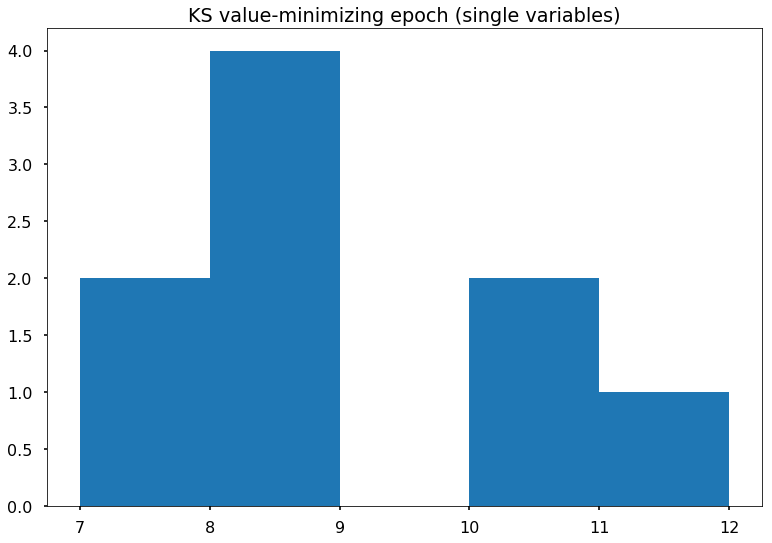

In [22]:
plt.hist(min_eps, bins=max(min_eps)-min(min_eps))
plt.title('KS value-minimizing epoch (single variables)')
plt.show()